# This notebook is an example of:
### - How to use the yfinance to get stock market data;
### - How to perform a 1-day forecast on dolar exchange rate from Ibovespa;
### - How to perform a 1-day forecast on Petrobras(Petr4) stocks from Ibovespa;

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [17]:
#load data from Brazilian stock exchange market IBOVESPA
tickers = ["^BVSP", "USDBRL=x"]
ibovDolar = web.get_data_yahoo(tickers)["Close"]
ibovDolar = ibovDolar.rename(columns = {'^BVSP': 'IBOV','USDBRL=x': 'DOLAR'}, inplace = False)
ibovDolar.head()

Symbols,IBOV,DOLAR
Date,,
2016-11-10,61201.0,3.2330
2016-11-11,59184.0,3.3956
2016-11-14,59657.0,3.3900
2016-11-15,NaN,3.4403
2016-11-16,60759.0,3.4417


In [18]:
#check missing data in dolar exchange rate and ibovespa index columns
cotCol = ibovDolar['DOLAR'].shape
ibovCol = ibovDolar['IBOV'].shape

print("Missing percentage of DOLAR data {:.2f}%.".format(100*(ibovDolar['DOLAR'].isnull().sum()/cotCol[0])))      
print("Missing percentage of IBOV data {:.2f}%.".format(100*(ibovDolar['IBOV'].isnull().sum()/ibovCol[0])))

Missing percentage of DOLAR data 10.09%.
Missing percentage of IBOV data 14.93%.


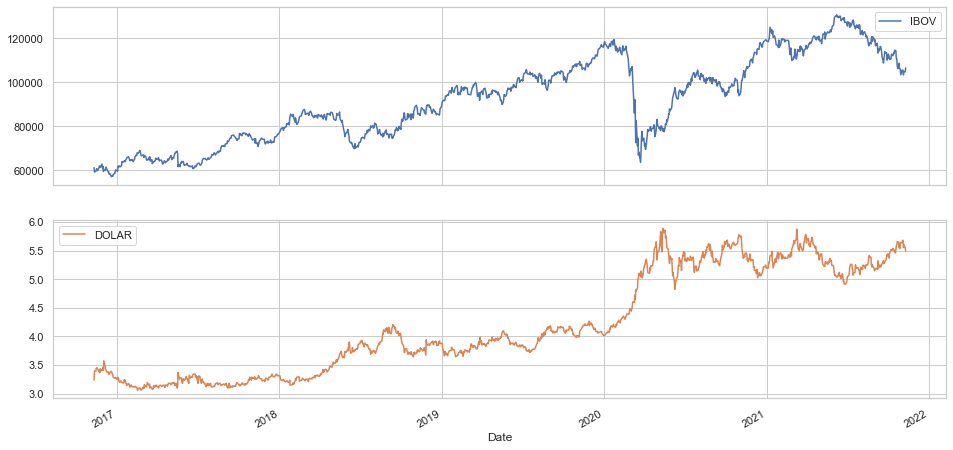

In [19]:
#visualization of missing data
sns.set_theme(style="whitegrid")
index.plot(subplots=True, figsize=(16, 8))
plt.show()

In [20]:
ibovDolar.head()

Symbols,IBOV,DOLAR
Date,,
2016-11-10,61201.0,3.2330
2016-11-11,59184.0,3.3956
2016-11-14,59657.0,3.3900
2016-11-15,NaN,3.4403
2016-11-16,60759.0,3.4417


In [21]:
#inpute missing data with interpolation.
ibovDolar['DOLAR'] = np.where(ibovDolar['DOLAR'] == 0, np.nan, ibovDolar['DOLAR'])
ibovDolar['DOLAR'] = ibovDolar.DOLAR.interpolate()

ibovDolar['IBOV'] = np.where(ibovDolar['IBOV'] == 0, np.nan, ibovDolar['IBOV'])
ibovDolar['IBOV'] = ibovDolar.IBOV.interpolate()

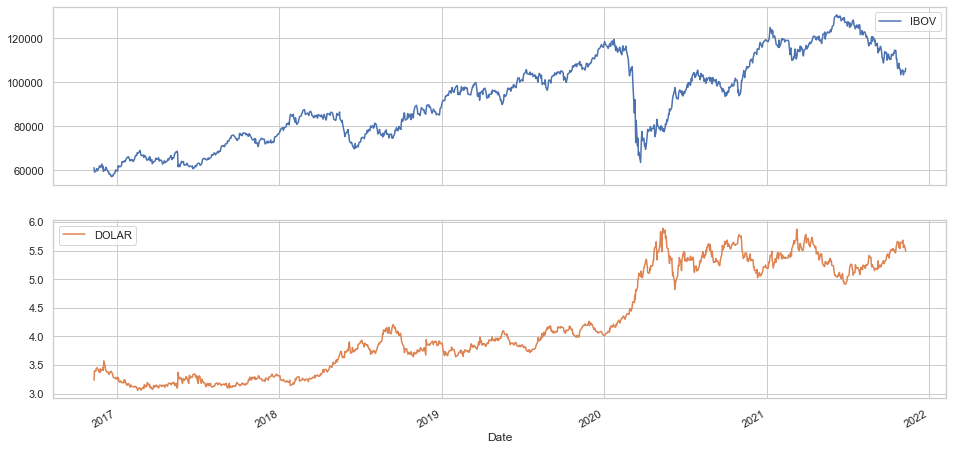

In [22]:
#visualization of data with inputted data
sns.set_theme(style="whitegrid")
ibovDolar.plot(subplots=True, figsize=(16, 8))
plt.show()

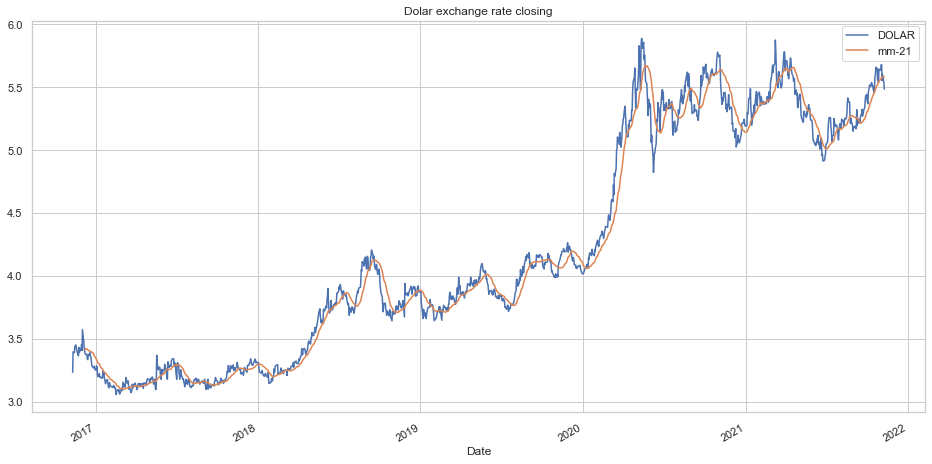

In [23]:
sns.set_theme(style="whitegrid")
ibovDolar['DOLAR'].plot(subplots=False, figsize=(16, 8))
ibovDolar['DOLAR'].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.title('Dolar exchange rate closing')
plt.legend()
plt.show()

### Petrobras(PETR4) stocks and moving average plots

In [24]:
petr4 = web.get_data_yahoo('petr4.sa')
petr4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-10,17.18,15.50,17.10,15.50,94683900.0,13.129220
2016-11-11,15.46,13.94,15.18,14.01,129811400.0,11.867121
2016-11-14,14.18,13.33,13.80,14.00,86623000.0,11.858650
2016-11-16,14.96,14.18,14.55,14.74,77406600.0,12.485466
2016-11-17,15.32,14.29,15.15,14.29,51535300.0,12.104296


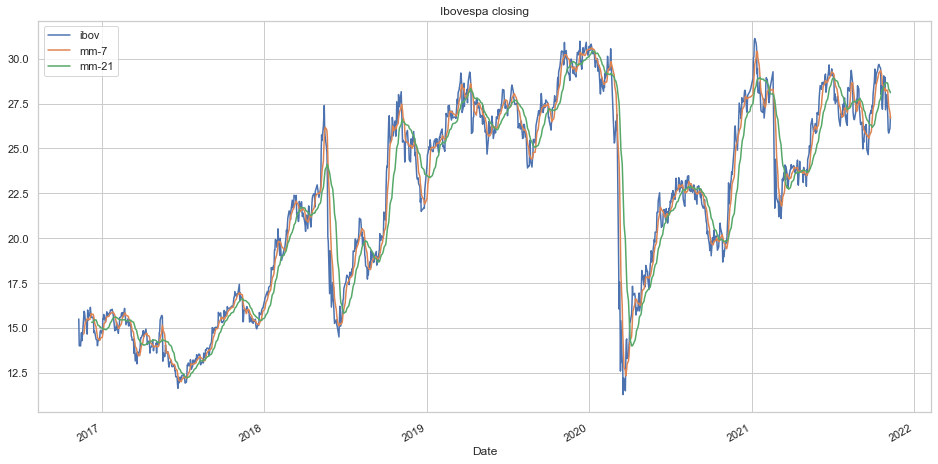

In [25]:
sns.set_theme(style="whitegrid")
# Preço de fechamento
petr4["Close"].plot(figsize=(16, 8), label="ibov")
# Média móvel 7 dias
petr4["Close"].rolling(7).mean().plot(label="mm-7")
# Média móvel 21 dias
petr4["Close"].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.title('Ibovespa closing')
plt.legend()
plt.show()

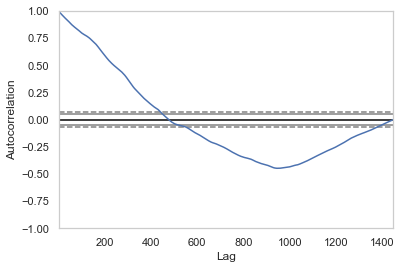

In [26]:
 _ = autocorrelation_plot(ibovDolar['DOLAR'])

In [27]:
ibovDolar2 = ibovDolar.reset_index()

In [28]:
ibovDolar2 = ibovDolar2[(ibovDolar2['Date'] > '2021-1-1')]

### Day ahead forecast with ARIMA algorithm

Test RMSE: 0.047


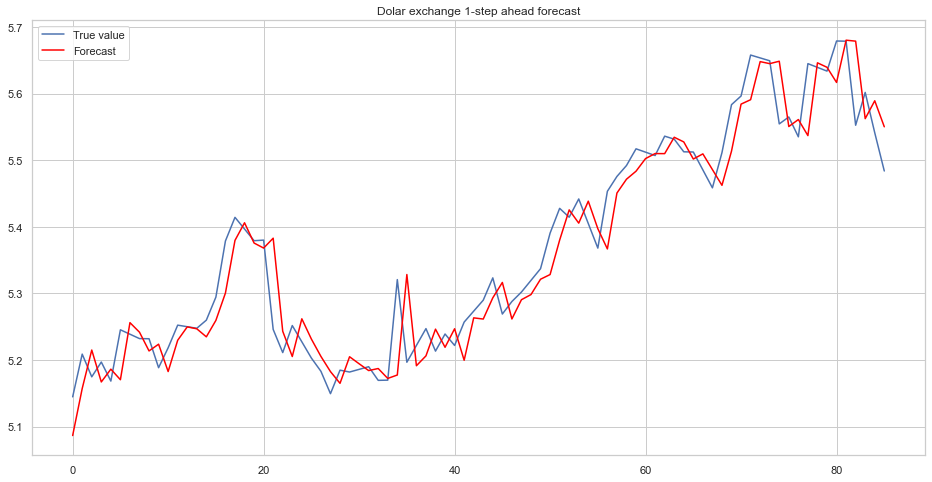

In [29]:
# split into train and test sets
X = ibovDolar2['DOLAR'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(16, 8))
plt.plot(test, label='True value')
plt.plot(predictions, color='red', label = 'Forecast')
plt.legend()
plt.title('Dolar exchange 1-day ahead forecast')
plt.show()

In [30]:
p4 = petr4["Close"].reset_index()
p4 = p4[(p4['Date']> '2021-1-1')]

Test RMSE: 0.756


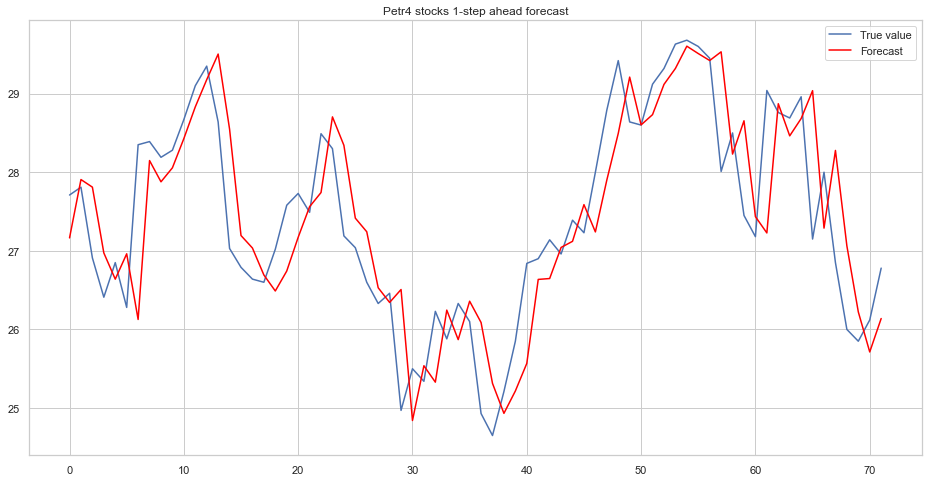

In [32]:
# split into train and test sets
X = p4["Close"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(16, 8))
plt.plot(test, label='True value')
plt.plot(predictions, color='red', label = 'Forecast')
plt.legend()
plt.title('Petr4 stocks 1-step ahead forecast')
plt.show()